In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm

In [2]:
img = cv2.imread("img/baboon.png",0)

In [3]:
h1 = np.array([[0,0,-1,0,0],
                  [0,-1,-2,-1,0],
                  [-1,-2,16,-2,-1],
                  [0,-1,-2,-1,0],
                  [0,0,-1,0,0]])

h2 = np.array([[1,4,6,4,1],
                   [4,16,24,16,4],
                   [6,24,36,24,6],
                   [4,16,24,16,4],
                   [1,4,6,4,1]])/256

h3 = np.array([[-1,0,1],
               [-2,0,2],
               [-1,0,1]])

h4 = np.array([[-1,-2,-1],
               [0,0,0],
               [1,2,1]])


dst1 = cv2.filter2D(img, -1, h1)
dst2 = cv2.filter2D(img, -1, h2)
dst3 = cv2.filter2D(img, -1, h3)
dst4 = cv2.filter2D(img, -1, h4)


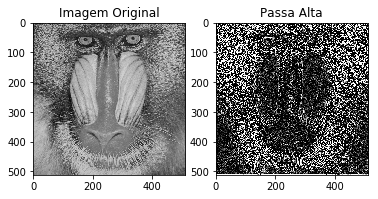

In [4]:
fig = plt.figure()

a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img,cmap="gray", norm = NoNorm())
a.set_title('Imagem Original')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(dst1,cmap="gray", norm = NoNorm())
a.set_title('Passa Alta')

plt.show()

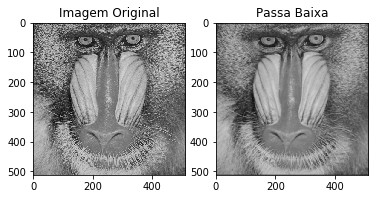

In [5]:
fig = plt.figure()

a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img,cmap="gray", norm = NoNorm())
a.set_title('Imagem Original')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(dst2,cmap="gray", norm = NoNorm())
a.set_title('Passa Baixa')

plt.show()

[[  0   0   0 ...  96 122   0]
 [  0   0   0 ...  65  38   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0  19   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


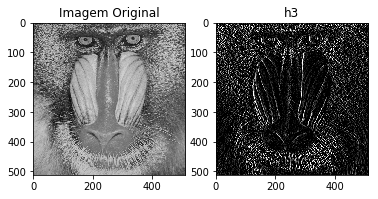

In [6]:
fig = plt.figure()

print(dst3)

a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img,cmap="gray", norm = NoNorm())
a.set_title('Imagem Original')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(dst3,cmap="gray", norm = NoNorm())
a.set_title('h3')

plt.show()

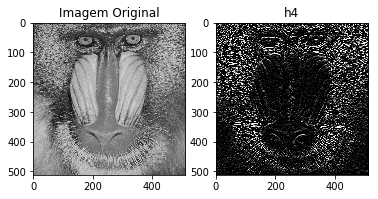

In [7]:
fig = plt.figure()

a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img,cmap="gray", norm = NoNorm())
a.set_title('Imagem Original')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(dst4,cmap="gray", norm = NoNorm())
a.set_title('h4')

plt.show()

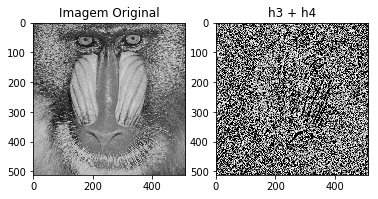

In [8]:
tmp1 = cv2.filter2D(img, -1, h3)
tmp2 = cv2.filter2D(img, -1, h4)

dst5 = np.sqrt(np.square(tmp1) + np.square(tmp2))
dst5 =  dst5.astype(dtype=np.uint8)

fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img,cmap="gray", norm = NoNorm())
a.set_title('Imagem Original')

a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(dst5,cmap="gray")
a.set_title('h3 + h4')

plt.show()


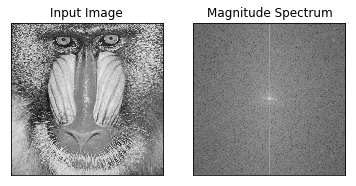

In [13]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [20]:
gaussian =cv2.getGaussianKernel(512,11)
gaussian = gaussian * gaussian.T

mask = np.array(gaussian,gaussian)
print(mask)

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

ValueError: operands could not be broadcast together with shapes (512,512,2) (512,512) 